Boston Housing Prediction

In [4]:
import numpy as np
import pandas as pd
#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

Loading the Data

In [6]:
mydata=pd.read_csv(r"E:\CSV files\HousingData.csv")
mydata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
mydata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Summary Statistics of the Dataset
Observations:

* CRIM: Per capita crime rate by town
  * Around 75% of the crime rate falls between ~0-4 with a max of 88 suggesting a possible outlier
* ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
   * Over 50% have 0% have residential land zoned for lots over 25,00sq.ft with the max 100%, suggesting this is perhaps a rare commodity.
* INDUS: Proportion of non-retail business acres per town
   * Ranges from 0.4-27% with an average of 11%, suggesting most towns have some industrial businesses.
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * With a mean of 0.069 only ~7% of houses bound the Charles River.
* NOX: Nitric Oxide concentration (parts per 10 million)
   * Ranges from 0.38-0.87 with a average of 0.55. Distribution looks nominal.
* RM: The average number of rooms per dwelling
   * Ranges from 3.5-8.7 with an average of 6.2. Distribution looks nominal.
* AGE: Proportion of owner-occupied units built before 1940
   * Ranges from 2.9-100y with an averaga of 68y. Distribution looks nominal.
* Min age of 2.9y indicates that no houses in the database are newly built
   * DIS: Weighted distances to five Boston employment centers
* Ranges form 1.1-12.1 with an average of 3.7. Distribution looks nominal.
   * RAD: Index of accessibility to radial highways
* Ranges from 1-24 with over 75% being the max 24.
   * There is a large jump from the 50th percentile (5) and 75th percentile (24). Speculating that perhaps there are 2 cathegories of houses, those in rural areas and those more urban.
* TAX: Full-value property-tax rate per 10,000 dollars
   * Ranges from 187-711 with and average of 408. Distribution looks nominal.
* That range suggests these are mid to high income houses.
   * PTRATIO: Pupil-teacher ratio by town
* Ranges from 12.6-22 with an avergage of 18.4. Distribution looks nominal.
   * LSTAT: % lower status of the population
* Ranges from 7-37.9% with an average of 12%. This indicates that most areas have little lower socio-economic class.
   * The jump from 75th percentile (16.9%) to the max (37%) is indicative of a lower socio-economic area or less likely an outlier
* MEDV: Median value of owner-occupied homes in 1000 dollars
  * Ranges from 5k-50k with an average of 22. Distribution looks nominal.

In [10]:
mydata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plotting all Columns

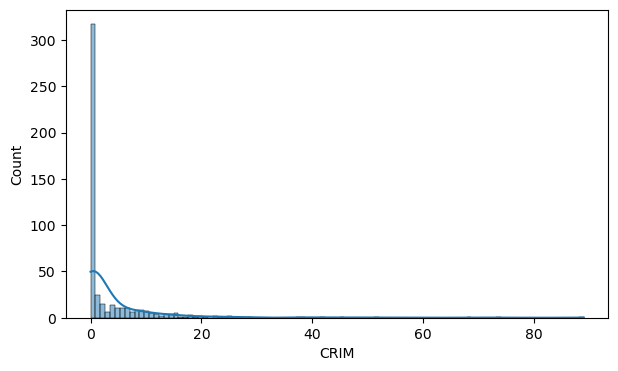

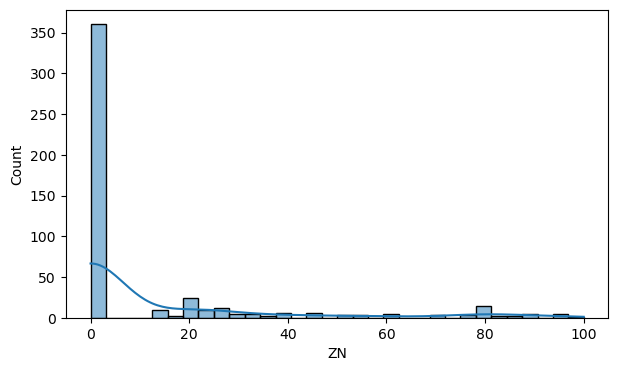

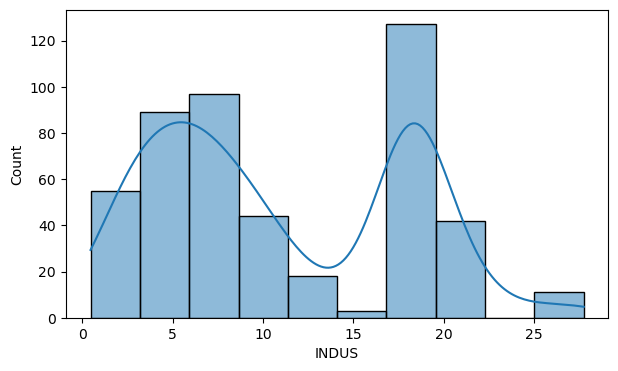

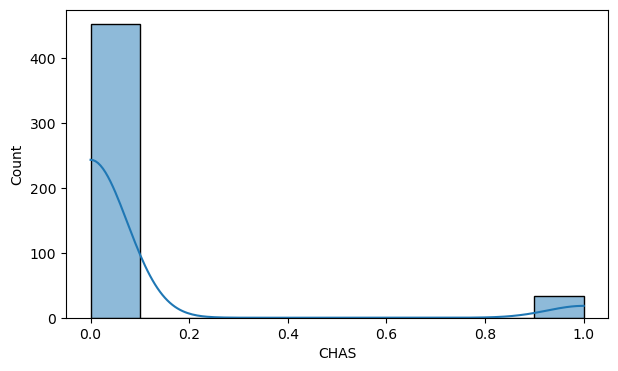

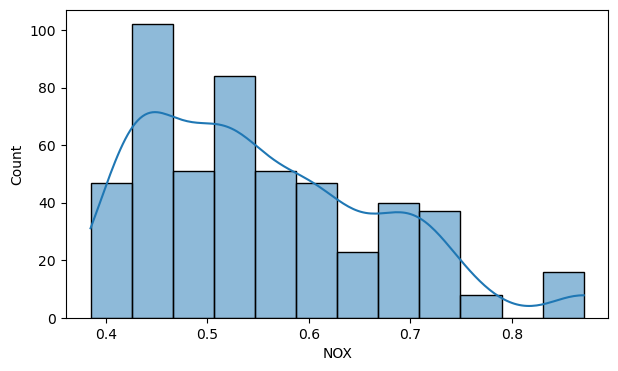

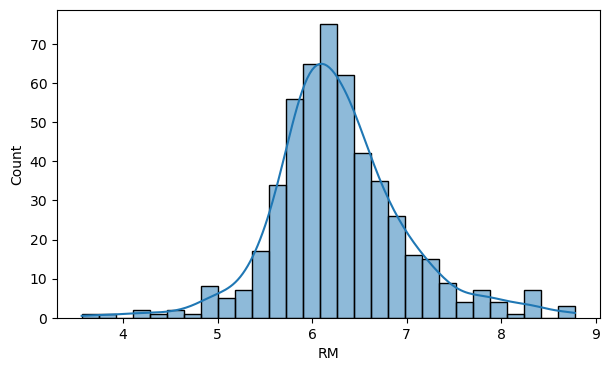

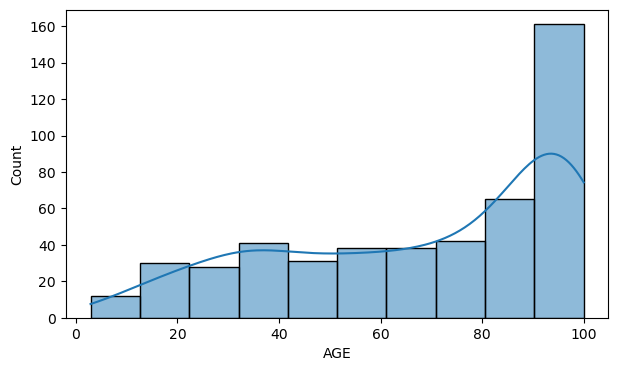

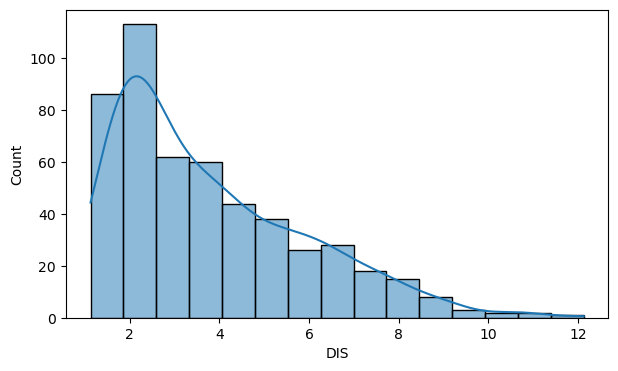

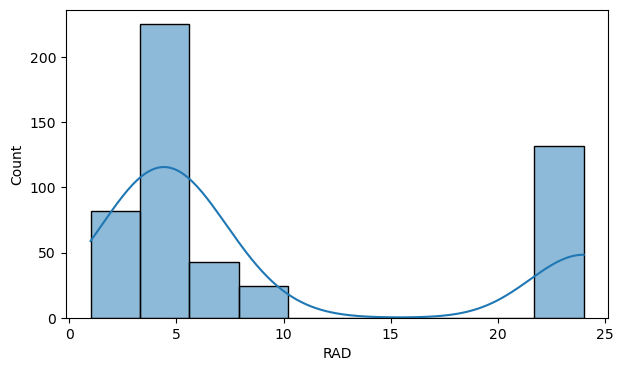

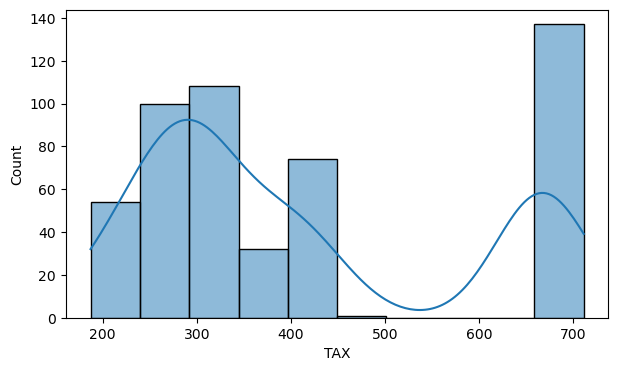

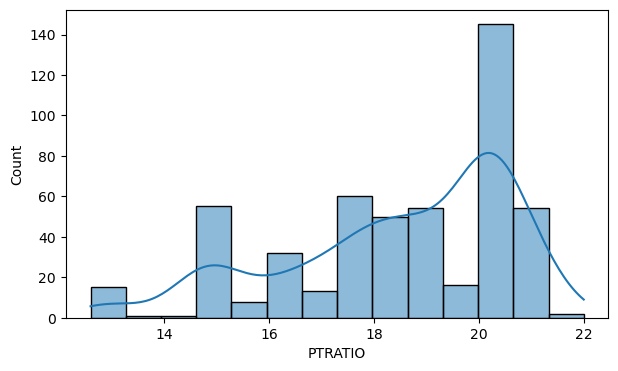

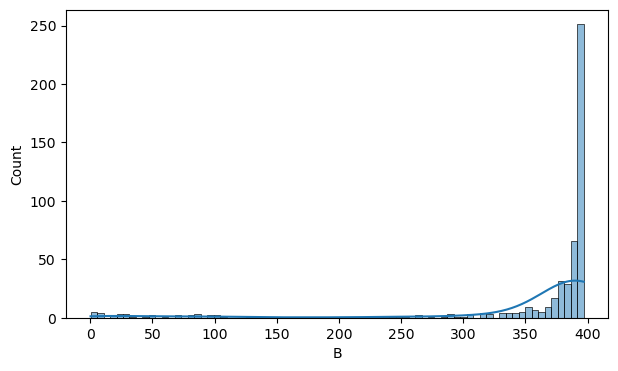

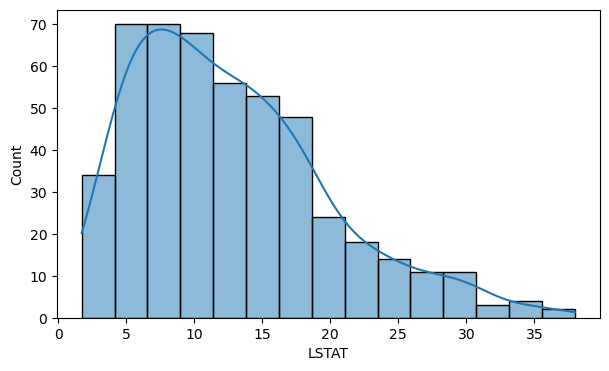

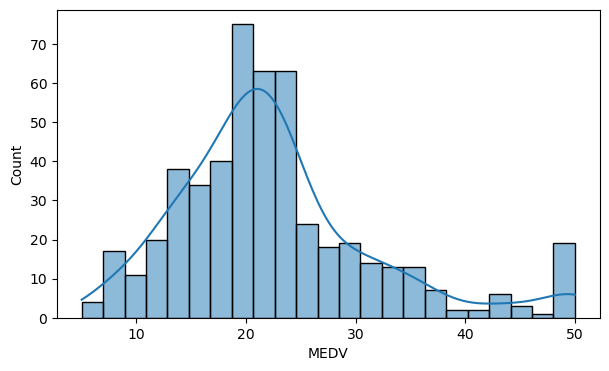

In [12]:
#Plotting all columns to look at their distribution
for i in mydata.columns:
    plt.figure (figsize=(7,4))
    sns.histplot(data=mydata,x=i,kde=True)
    plt.show()

## Observations: ##

* CRIM: Per capita crime rate by town
  * Heavily right skewed with most values being 0.
* ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
  * Most residential areas have 0 ZN, followed by a near uniform distribution from 10-100%
* INDUS: Proportion of non-retail business acres per town
  * Apears to be 2 peaks centered at 5% and 17%.
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  * Very few houses tract river
* NOX: Nitric Oxide concentration (parts per 10 million)
  * Right skewed
* RM: The average number of rooms per dwelling
  * Reletively normal distribution around 6.2
* AGE: Proportion of owner-occupied units built before 1940
  * Heavily left-skewed, suggesting most hases are older
* DIS: Weighted distances to five Boston employment centers
  * Heavily right-skewed
* RAD: Index of accessibility to radial highways
  * Reiterrates our above observation, likelke two cathegories of houses (rural and urban).
* TAX: Full-value property-tax rate per 10,000 dollars
  * Again looks like a similar representation to RAD of two cathegories of houses (rural and urban).
* PTRATIO: Pupil-teacher ratio by town
  * Left-skewed
* LSTAT: % lower status of the population
  * Right-skewed suggesting there are fewer overall lower socio-economic people.
* MEDV: Median value of owner-occupied homes in 1000 dollars
  * Slightly skewed. As this is our dependent variable will need to take action to normalize it.

## Log Transformation on the MEDV column

In [15]:
mydata['MEDV_log']=np.log(mydata['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

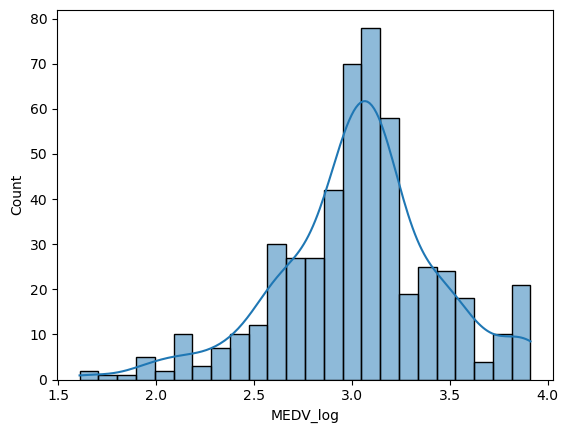

In [16]:
sns.histplot(data=mydata,x='MEDV_log',kde=True)

## Check the correlation using heatmap

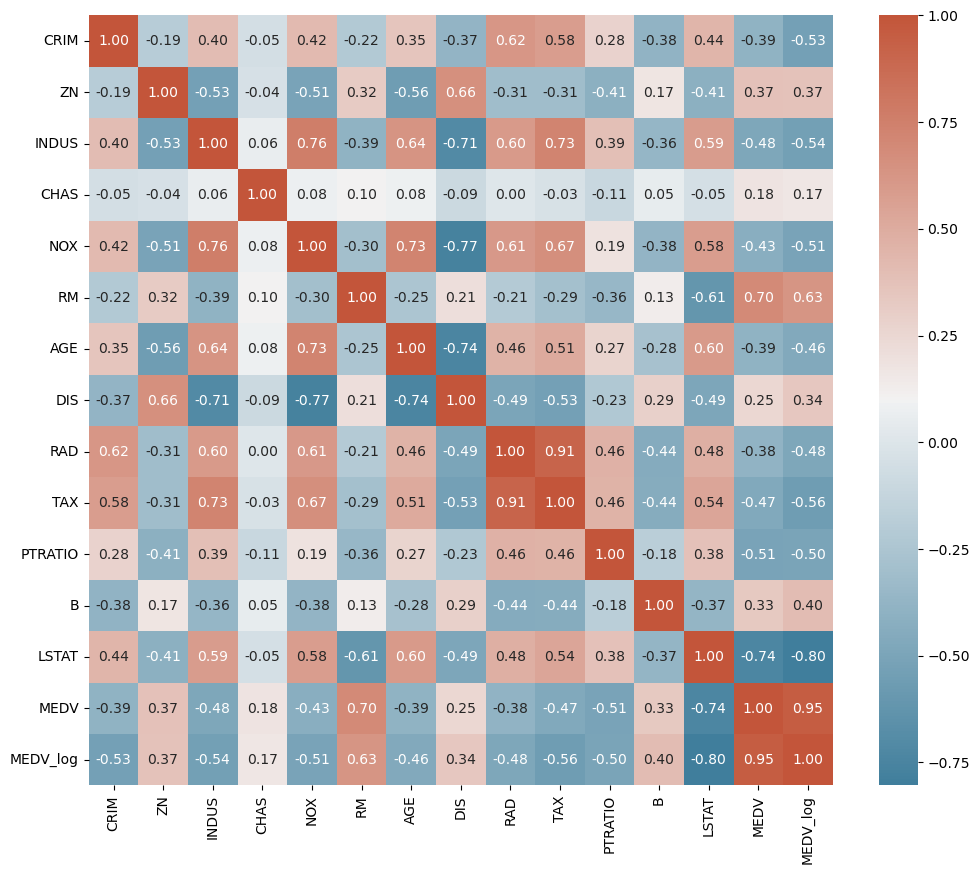

In [18]:
plt.figure(figsize=(12,10))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(mydata.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()
# It is a negative correlation

### Correlation Observations
* The highest +ve correlating feature for MEDV_log is RM
  * This means that more rooms indicate a larger home
* The highest -ive correlating feature for MEDV_log is LSTAT
  * This makes sense as cities often have lower income areas.


#### Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

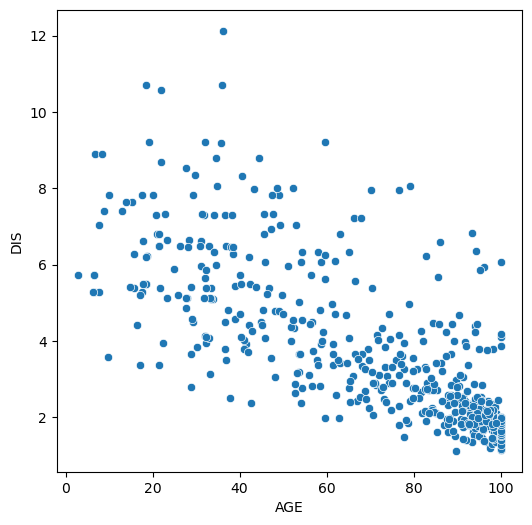

In [21]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = mydata)
plt.show()

* Observations
  * The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town

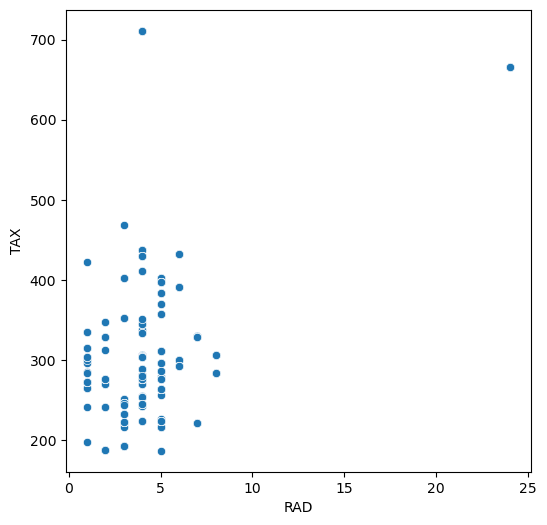

In [23]:
#Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6,6))
sns.scatterplot(x='RAD',y='TAX',data=mydata)
plt.show()

### Observations
 * The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
 

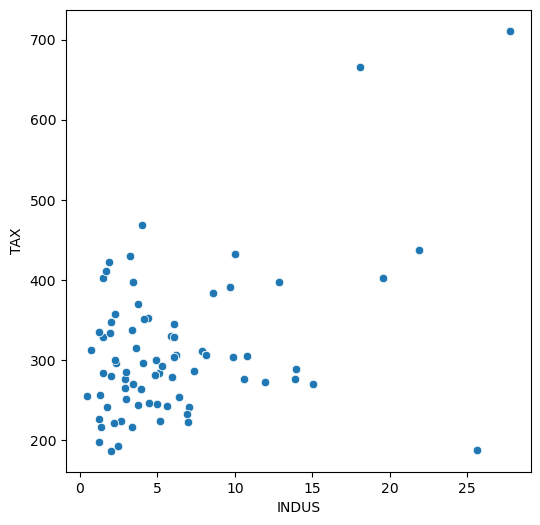

In [25]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = mydata)

plt.show()



### Observations
 * The tax rate appears to increase with an increase in the proportion of non-retail business acres per town

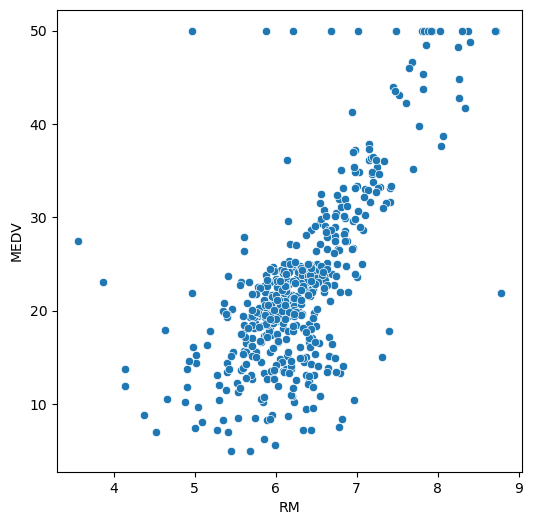

In [27]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = mydata)

plt.show()

### Observations
 * The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
There are few outliers and the data seems to be capped at 50.

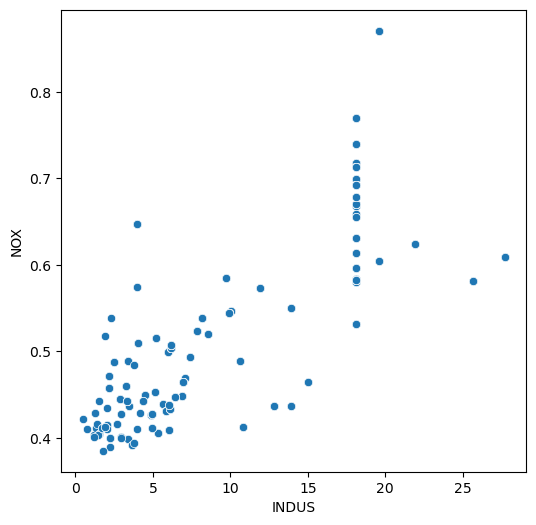

In [29]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize=(6,6))
sns.scatterplot(x='INDUS',y='NOX',data=mydata)
plt.show()

### Observation
 * Nitric Oxide does seem to increase with industrial areas
   * Outliers present

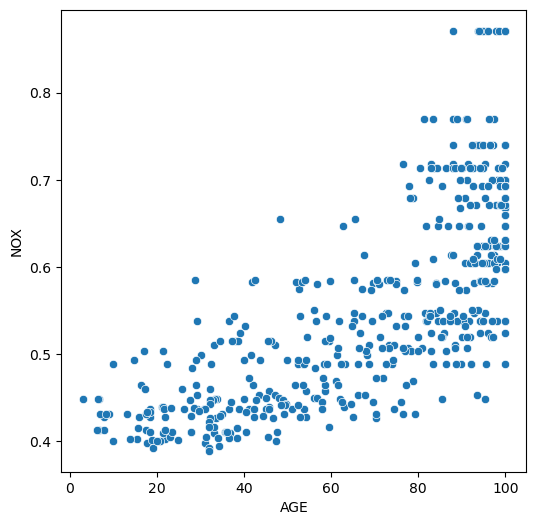

In [31]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6,6))
sns.scatterplot(x='AGE',y='NOX',data=mydata)
plt.show()

### Observations
 * Slight increase in Nitric Oxide with age of the house, againg giving credence to the theory that those are more industrial areas

### Observation
 *Nitric Oxide strongly decreases with distance to employment centers. Possible that those centers are located in newer less industruse parts of Boston.

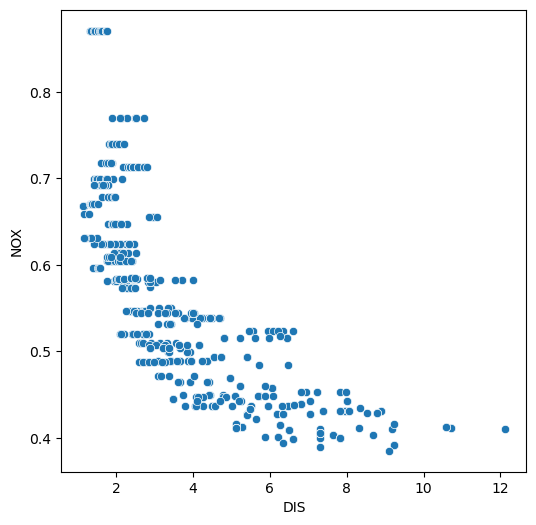

In [33]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6,6))
sns.scatterplot(x='DIS',y='NOX',data=mydata)
plt.show()

#### Scatterplot to visualize the relationship between significant features

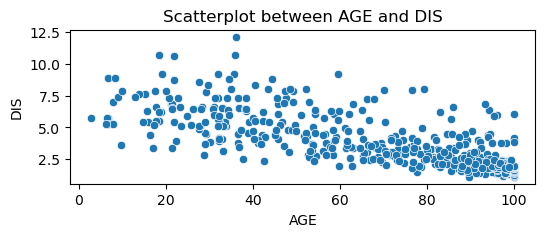

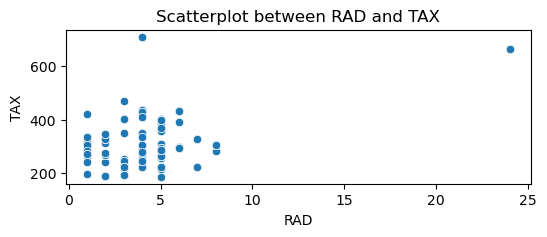

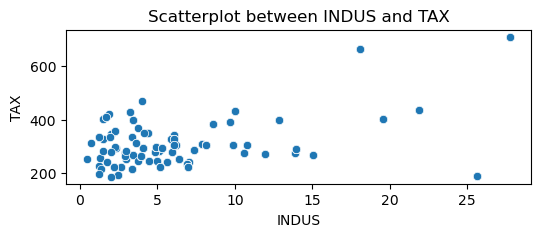

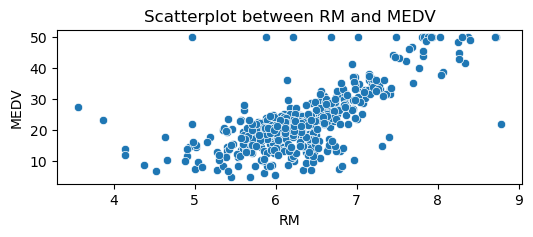

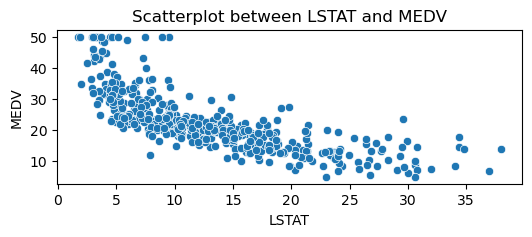

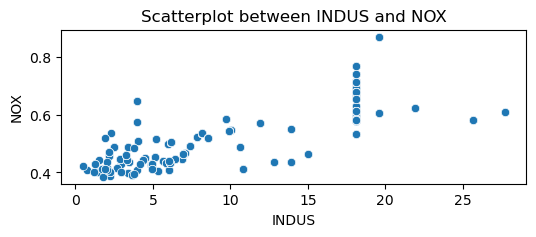

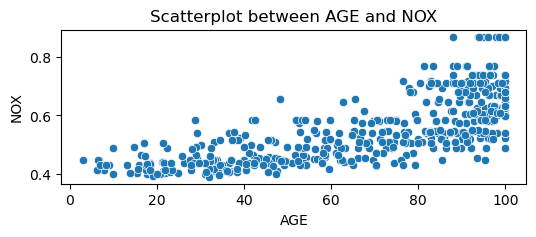

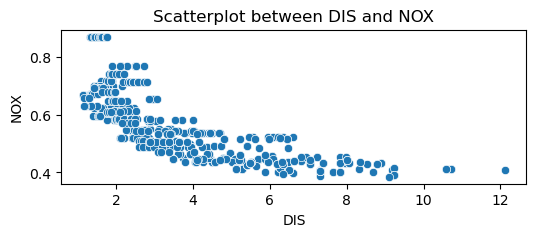

In [156]:

# Scatterplot to visualize the relationship between significant features
significant_features = [('AGE', 'DIS'), ('RAD', 'TAX'), ('INDUS', 'TAX'), ('RM', 'MEDV'), ('LSTAT', 'MEDV'), ('INDUS', 'NOX'), ('AGE', 'NOX'), ('DIS', 'NOX')]
for feature_pair in significant_features:
    plt.figure(figsize=(6, 2))
    sns.scatterplot(x=feature_pair[0], y=feature_pair[1], data=mydata)
    plt.title(f'Scatterplot between {feature_pair[0]} and {feature_pair[1]}')
    plt.show()


## Split the Dataset
 Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets. #



In [159]:
# Separate the dependent variable and indepedent variables
Y=mydata['MEDV_log']
X=mydata.drop(columns={'MEDV','MEDV_log'})
# Add an intercept term
X=sm.add_constant(X)

### Intercept Term
Allows the regression line to be shifted up or down on the y-axis to better fit the data. The value of the intercept term can be interpreted as the expected value of the dependent variable when all independent variables are set to zero.

In [99]:
# splitting the data in 70:30 ratio of train to test data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)



In [184]:
# Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to check VIF
def checking_vif(train):
    vif = mydata.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    return vif
X_train = X_train.drop(columns='TAX')


KeyError: "['TAX'] not found in axis"

### Model building
#### Linear regression Model1

In [148]:
# Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [162]:
# Function to check VIF
def checking_vif(train):
    vif = mydata.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    return vif

